### Working with Text as data

#### This file is used for text analysis on two sets of buzzfeed news data separated as real and fake news by buzzfeed researchers. 

##### Created by Samikshya Siwakoti
###### May 26th, 2021


### List of tasks

1. Collect some texts.  Compare them in a number of ways.
2. You will likely want to have them be “bags of words.”  Prepare the text through removing upper case, white space, punctuation, and consider stemming the words, if appropriate for you purpose.  
3. Generate relative word frequencies for each bag of words, and compare them to each other.
4. Articulate what differences (if any) you notice and whether this comports with a theory of why these bags of words should be similar or different.
5. Run statistical tests of association between the bags of words (correlation, cosine similarity, regression or Chi-squared), and explain what they indicate.
6. Try topic modeling on the texts.
7. Generate some wordclouds of your texts

In [1]:
#First, I will import the relevant libraries
import nltk
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from nltk import word_tokenize, sent_tokenize
from collections import Counter
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as sp


First, I am looking at fake and real news dataset from Buzzfeed and trying to compare differences within the texts tagged as fake and text tagged as real. The dataset consists of texts from the time of 2016 elections in the US. I will also make some comparisons of the texts with politifact real and fake news datasets which has a similar structure as the buzzfeed datasets towards the end.

In [86]:
# create dictionary with keys being file name and values being the content of the speech

files = ['buzzfeed_real', 'buzzfeed_fake']
paper_words = {}

for d in files: 
    file_path = '/Users/samikshya/Desktop/data_scipp/' + str(d) + '.txt'
    with open(file_path, 'rb') as f:
        #f = [f.read().decode('latin8', 'ignore')]
        f = [f.read().decode('utf8', 'ignore').replace('\r\n', " ").replace('\ufeff', '')]
        paper_words[d] = f

In [87]:
import shorttext

preprocessor1 = shorttext.utils.standard_text_preprocessor_1()

# get corpus into the right format to be preprocessed
docids = sorted(paper_words.keys())
addresses = [a for docid in docids for a in paper_words[docid]]

# apply preprocessing
corpus = [preprocessor1(a).split(' ') for a in addresses]

# remove empty characters
corpus = [[w for w in d if w not in ['', '\n', '\r\n', '\ufeff']] for d in corpus]

buzz_dtm = shorttext.utils.DocumentTermMatrix(corpus, docids=docids, tfidf=False)

#buzz_dtm.get_doc_tokens('buzzfeed_real')

In [88]:
# Print top words from real news dataset
data_real = buzz_dtm.get_doc_tokens('buzzfeed_real')
sorted_real = sorted(data_real.items(), key=lambda x: x[1], reverse=True) 
print(sorted_real[:20])

[('trump', 460.0), ('said', 282.0), ('clinton', 202.0), ('say', 162.0), ('debat', 140.0), ('one', 131.0), ('presid', 124.0), ('donald', 122.0), ('peopl', 122.0), ('would', 118.0), ('äî', 118.0), ('know', 116.0), ('new', 116.0), ('us', 109.0), ('campaign', 105.0), ('like', 96.0), ('hillari', 92.0), ('get', 89.0), ('state', 89.0), ('think', 87.0)]


In [89]:
# Print top words from fake news dataset
data_fake = buzz_dtm.get_doc_tokens('buzzfeed_fake')
sorted_fake = sorted(data_fake.items(), key=lambda x: x[1], reverse=True) 
print(sorted_fake[:20])

[('clinton', 240.0), ('hillari', 206.0), ('trump', 174.0), ('peopl', 131.0), ('one', 123.0), ('like', 101.0), ('would', 99.0), ('said', 93.0), ('know', 92.0), ('state', 91.0), ('get', 79.0), ('obama', 79.0), ('presid', 79.0), ('thing', 78.0), ('time', 76.0), ('report', 75.0), ('could', 71.0), ('us', 71.0), ('äì', 70.0), ('even', 69.0)]



Based on the frequencies of top 20 terms from the two datasets within Buzzfeed, I can see that there is not as much variation within the two sets. The terms point to discussions about Hillary Clinton, Donald Trump and general climate of the elections. We do see that terms Hillary Clinton appear most frequently in the fake news dataset. However, if I turn the tf-idf (term frequency inverse document frequency) scores on for the two datasets, I can see some more interesting patterns within the datasets.

In [90]:
buzz_dtm_2 = shorttext.utils.DocumentTermMatrix(corpus, docids=docids, tfidf=True)

In [91]:
# Print top important words from real dataset
data_real = buzz_dtm_2.get_doc_tokens('buzzfeed_real')
sorted_real = sorted(data_real.items(), key=lambda x: x[1], reverse=True) 
print(sorted_real[:20])

[('manag', 0.19008514521055303), ('wednesday', 0.18329639002446185), ('carter', 0.16293012446618832), ('conway', 0.16293012446618832), ('wildstein', 0.14256385890791476), ('hes', 0.1289863485357324), ('that', 0.1289863485357324), ('michael', 0.11540883816355005), ('joe', 0.10862008297745887), ('perform', 0.10862008297745887), ('david', 0.10183132779136769), ('doesnt', 0.10183132779136769), ('baroni', 0.09504257260527652), ('closur', 0.08825381741918534), ('didnt', 0.08825381741918534), ('gazprom', 0.08825381741918534), ('port', 0.08825381741918534), ('saidsh', 0.08825381741918534), ('wound', 0.08825381741918534), ('kelli', 0.08146506223309416)]


In [92]:
# Print top important words from fake dataset
data_fake = buzz_dtm_2.get_doc_tokens('buzzfeed_fake')
sorted_fake = sorted(data_fake.items(), key=lambda x: x[1], reverse=True) 
print(sorted_fake[:20])

[('ranbaxi', 0.19954724840475196), ('patient', 0.16803978813031745), ('chai', 0.14703481461402776), ('falcon', 0.14703481461402776), ('somali', 0.13653232785588293), ('caller', 0.11552735433959324), ('adan', 0.10502486758144841), ('clone', 0.10502486758144841), ('delet', 0.10502486758144841), ('hivaid', 0.10502486758144841), ('abedin', 0.09452238082330357), ('fundrais', 0.09452238082330357), ('oligarch', 0.09452238082330357), ('patrol', 0.09452238082330357), ('puzder', 0.09452238082330357), ('drive', 0.08401989406515872), ('expensesäù', 0.08401989406515872), ('potus', 0.08401989406515872), ('cheryl', 0.07351740730701388), ('fda', 0.07351740730701388)]



Looking at the outputs, I can see some rare terms in the fake news dataset that connect to the conspiracy theory that Hillary Clinton had been cloned, Clinton foundation's Ranbaxi controversy - the foundation distributed watered-down HIV AID medication in Sub-Saharan Africa.  On the real news, the important terms point towards Michael Conway hearing and some more people also come up- David Wildstein, Bill Baroni, Joe Biden.

Text(0.5, 1.0, 'Wordcloud from fake news dataset')

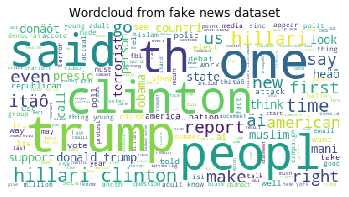

In [27]:
from wordcloud import WordCloud
Fake = ' '.join(corpus[0])
wordcloud = WordCloud(background_color="white", max_font_size=60).generate(Fake)
plt.imshow(wordcloud)
plt.axis("off")
plt.title ("Wordcloud from fake news dataset")

Text(0.5, 1.0, 'Wordcloud from real news dataset')

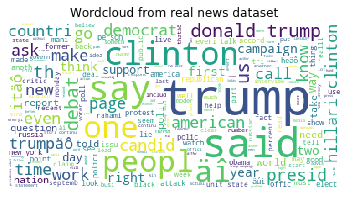

In [28]:

Real = ' '.join(corpus[1])
wordcloud = WordCloud(background_color="white", max_font_size=60).generate(Real)
plt.imshow(wordcloud)
plt.axis("off")
plt.title ("Wordcloud from real news dataset")


Between the two word clouds of fake and real news datasets, we don't see a lot of difference. Both are pointing to us elections and discussions on the two presidential candidates. However, Hillary Clinton appears more frequently in the fake news dataset.

Now, I would like to run topic modeling for the overall Buzzfeed data without splitting the data into fake or real news. For this, I will use Latent Dirichlet Allocation (LDA) method and use 10 topic clusters. LDA is a probabilistic statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. Initially, the algorithm assigns probabilities of a document belonging to different clusters using a Dirichlet distribution and then using the tf-idf metric, it redistributes the probabilities and iterates over this process until the probabilities of a document belonging to clusters of topics, does not change.

In [13]:
reviews_datasets = pd.read_csv('/Users/samikshya/Desktop/data_scipp/buzzfeed.csv')
                   

In [15]:
reviews_datasets.head(5)


,Unnamed: 0,source,date,title,text,fake,date_time
0,BuzzFeed_Fake_1-Webpage.json,http://www.addictinginfo.org,2016-09-19,Proof The Mainstream Media Is Manipulating The...,I woke up this morning to find a variation of ...,1,2016-09-18 20:00:00
1,BuzzFeed_Fake_10-Webpage.json,http://eaglerising.com,2016-09-21,"Charity: Clinton Foundation Distributed ""Water...",Former President Bill Clinton and his Clinton ...,1,2016-09-20 20:08:41
2,BuzzFeed_Fake_11-Webpage.json,http://eaglerising.com,2016-09-21,A Hillary Clinton Administration May be Entire...,After collapsing just before trying to step in...,1,2016-09-20 20:10:38
3,BuzzFeed_Fake_12-Webpage.json,http://www.addictinginfo.org,2016-09-19,Trump’s Latest Campaign Promise May Be His Mos...,"Donald Trump is, well, deplorable. He’s sugges...",1,2016-09-18 20:00:00
4,BuzzFeed_Fake_13-Webpage.json,http://www.proudcons.com,NaN,Website is Down For Maintenance,Website is Down For Maintenance,1,NaN


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(reviews_datasets['text'].values.astype('U'))

In [17]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/samikshya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=9, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=9, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [36]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['white', 'know', 'rahami', 'people', 'like', 'new', 'trump', 'president', 'obama', 'said']


Top 10 words for topic #1:
['just', 'know', 'foundation', 'campaign', 'hillary', 'donald', 'debate', 'said', 'clinton', 'trump']


Top 10 words for topic #2:
['com', 'department', 'private', 'news', 'mails', 'mail', 'hillary', 'fbi', '2015', 'clinton']


Top 10 words for topic #3:
['people', 'policy', 'cruz', 'debate', 'russian', 'donald', 'russia', 'said', 'page', 'trump']


Top 10 words for topic #4:
['wednesday', '2016', 'york', 'county', '2017', 'court', 'clinton', 'rahami', 'new', 'federal']


Top 10 words for topic #5:
['hawkins', 'know', 'john', 'adults', 'debate', 'people', 'said', 'trump', 'clinton', 'hillary']


Top 10 words for topic #6:
['life', 'shooting', 'man', 'things', 'know', 'said', 'black', 'charlotte', 'people', 'police']


Top 10 words for topic #7:
['just', 'people', 'terrorists', 'said', 'donald', 'new', 'president', 'hillary', 'clinton', 'tru

Based on the topic clusters I can guess the following topics:

1. Serial bomber Ahmad Rahami

2. Ranbaxi controversy - Clinton distributing watered-down HIV medication in Sub-Saharan Africa

3. Hillary Clinton’s email controversy

4. Russia   

5. Michael Cohen hearing

6. General election debates

7. Race riots and protests in Charlotte

8. Terrorism
    

### TF-IDF using bi-grams and other features
I will now perform tf-idf to find the most important/significant words between the two sets of data- Buzzfeed real and fake news data. I am interested to see the important terms as bi-grams.
I am ignoring stopwords and too common and too rare terms 
i.e. ignore terms that appear in more than 90% and less than 10% of the documents 


In [93]:

# Importing the first file and pre-processing
with open('/Users/samikshya/Desktop/data_scipp/buzzfeed_fake.txt') as file:
    text = file.read()
import re
text=re.sub("[^A-Za-z!.:?]+"," ",text)

# Importing the second file and pre-processing
with open('/Users/samikshya/Desktop/data_scipp/buzzfeed_real.txt') as file:
    text2 = file.read()
import re
text2=re.sub("[^A-Za-z!.:?]+"," ",text2)

# Importing the first file and pre-processing
with open('/Users/samikshya/Desktop/data_scipp/politifact_fake.txt') as file:
    text3 = file.read()
import re
text3=re.sub("[^A-Za-z!.:?]+"," ",text3)

# Importing the second file and pre-processing
with open('/Users/samikshya/Desktop/data_scipp/politifact_real.txt') as file:
    text4 = file.read()
import re
text4=re.sub("[^A-Za-z!.:?]+"," ",text4)

In [94]:

vectorizer= TfidfVectorizer(use_idf=True, stop_words="english",min_df = 0.10, max_df = 0.90, ngram_range=(2,2))
vectors = vectorizer.fit_transform([text, text2])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
dataframe = pd.DataFrame(denselist, columns=feature_names)
df_t= pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
#ngram_range=(1,2), min_df = 0.10, max_df = 0.90

In [95]:
d1=dataframe.T[0].sort_values().tail(25)
d1.sort_values(ascending=False)

daily caller              0.091404
mail server               0.084875
private mail              0.078346
real hillary              0.065288
hiv aids                  0.058760
aids drugs                0.058760
advertisement story       0.052231
story continues           0.052231
cheryl mills              0.052231
foundation spent          0.052231
border patrol             0.052231
st cloud                  0.045702
moveon org                0.045702
clinton administration    0.045702
jason falconer            0.045702
clinton wants             0.045702
huma abedin               0.045702
congressional report      0.045702
clinton clinton           0.039173
defense pac               0.039173
jennifer palmieri         0.039173
employee benefits         0.039173
caller news               0.039173
common defense            0.039173
news foundation           0.039173
Name: 0, dtype: float64

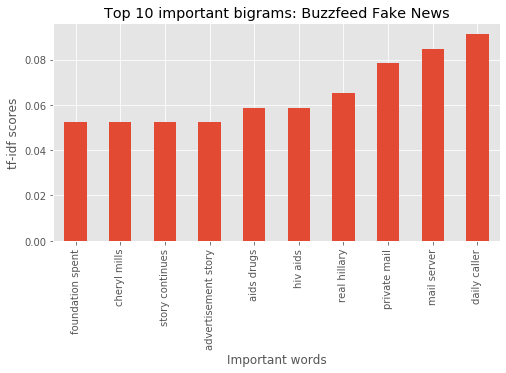

In [101]:
plt.style.use('ggplot')
plt.figure(figsize=(8,4))
temp = d1.tail(10)
temp.plot.bar(x='0', y='1')
plt.xlabel("Important words")
plt.ylabel("tf-idf scores")
plt.title("Top 10 important bigrams: Buzzfeed Fake News")
plt.show()

In [99]:
d2=dataframe.T[1].sort_values().tail(25)
d2.sort_values(ascending=False)

story continued         0.151560
carter page             0.102844
clinton said            0.092018
story highlights        0.092018
said said               0.086606
campaign manager        0.081193
african american        0.070367
merrill lynch           0.070367
port authority          0.070367
zero sum                0.059541
stop frisk              0.054128
gary johnson            0.048716
told cnn                0.048716
fort lee                0.048716
conway said             0.048716
ap photo                0.048716
gop nominee             0.043303
robert kennedy          0.043303
presidential debates    0.043303
keith lamont            0.043303
release tax             0.037890
point lead              0.037890
cruz said               0.037890
didn ask                0.037890
wildstein testified     0.037890
Name: 1, dtype: float64

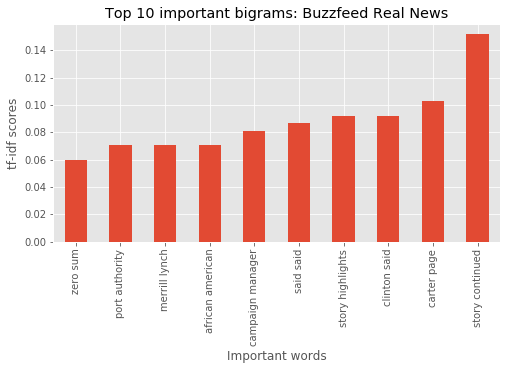

In [102]:
plt.style.use('ggplot')
plt.figure(figsize=(8,4))
temp2 = d2.tail(10)
temp2.plot.bar(x='0', y='1')
plt.xlabel("Important words")
plt.ylabel("tf-idf scores")
plt.title("Top 10 important bigrams: Buzzfeed Real News")
plt.show()

### Correlation between buzzfeed fake and real dataset 

In [69]:
df_t=dataframe.T

In [70]:
df_t.columns = ['Buzzfeed Fake','Buzzfeed Real']

In [71]:
df_t.head()

,Buzzfeed Fake,Buzzfeed Real
aaron pain,0.006529,0.000000
aaron woods,0.013058,0.000000
ab sept,0.000000,0.005413
abandon convention,0.000000,0.005413
abandon foolish,0.000000,0.005413


In [72]:
df_t.corr(method='pearson')

,Buzzfeed Fake,Buzzfeed Real
Buzzfeed Fake,1.00000,-0.69895
Buzzfeed Real,-0.69895,1.00000


The Pearson correlation coefficient represents the angular separation between two normalized data vectors measured from the mean.  Buzzfeed fake and real news have a Pearson correlation coefficient of -0.69. There is 69% correlation and the negative correlation sign means that the straight line model through data has negative slope or when one variable increases other decreases. Now, I want to compare the buzzfeed datasets with politifact datasets and use unigrams in the dataset.

In [78]:

vectorizer= TfidfVectorizer(use_idf=True, stop_words="english",min_df = 0.10, max_df = 0.90, ngram_range=(1,1))
vectors = vectorizer.fit_transform([text, text2,text3,text4])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
dataframe_2 = pd.DataFrame(denselist, columns=feature_names)
df_t2= pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
#ngram_range=(1,2), min_df = 0.10, max_df = 0.90

In [81]:
df_t2=dataframe_2.T
df_t2.columns = ['Buzzfeed Fake','Buzzfeed Real','Politifact Fake','Politifact Real']

In [80]:
df_t2.corr(method='pearson')

,Buzzfeed Fake,Buzzfeed Real,Politifact Fake,Politifact Real
Buzzfeed Fake,1.000000,0.074011,-0.015069,0.070982
Buzzfeed Real,0.074011,1.000000,-0.041675,0.242832
Politifact Fake,-0.015069,-0.041675,1.000000,-0.022862
Politifact Real,0.070982,0.242832,-0.022862,1.000000


We can see some difference in how the bag of words with unigrams compare across multiple files. For instance, the Politifact real and buzzfeed real dataset are similar by 24%; Buzzfeed fake and real data are similar by 7.4%; buzzfeed fake and politifact real dataset are more similar by 7%. These datasets are more similar to each other than when we look at buzzfeed fake and politifact fake dataset where the correlation coefficient is -0.015.